# Modeling

In this notebook we
1. Load '../Data/tweets_eda.pickle' which is the output of exploratory data analysis.
2. Apply VADER for sentiment analysis to generate labels.
3. Apply LSTM, mLSTM, CNN & TCN models to predict sentiment with labels generated by VADER, on both word-level texts and character-level texts.
4. Inpect results and tune model(s) further.
5. Compare models & come to the conclusion.

### Import Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_colwidth = 500

sns.set()
sns.set_style("whitegrid")
palette = sns.diverging_palette(220, 20, sep = 20, n = 8)
sns.set_palette(palette)

### Load Data

In [2]:
df = pd.read_pickle('../Data/tweets_eda.pickle')
df.head(1)

,index,Tweets,Has_predefined_movies,Tweets_tokens,Tweets_tokens_len,Tweets_tokens_remove_special_chars,Tweets_tokens_remove_special_chars_len,Tweets_tokens_counter,Tweets_tokens_counter_most_common,Tweets_tokens_remove_special_chars_remove_stop_words,Tweets_tokens_remove_special_chars_remove_stop_words_len,Tweets_tokens_remove_special_chars_remove_stop_words_counter,Tweets_tokens_remove_special_chars_remove_stop_words_counter_most_common,TF_IDF_score,TF_IDF_score_highest,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized_len,TF_IDF_score_lemmatized,TF_IDF_score_lemmatized_highest
0,299,Come. To. Mama. Own #Oceans8 on Blu-ray™ tomorrow.,[oceans8],"[Come, ., To, ., Mama, ., Own, #, Oceans8, on, Blu-ray™, tomorrow, .]",13,"[Come, To, Mama, Own, on, tomorrow]",6,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'on': 1, 'tomorrow': 1}","[(Come, 1)]","[Come, To, Mama, Own, tomorrow]",5,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'tomorrow': 1}","[(Come, 1)]","{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"[Come, To, Mama, Own, tomorrow]",5,"{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448}


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 19 columns):
index                                                                       7628 non-null int64
Tweets                                                                      7628 non-null object
Has_predefined_movies                                                       7628 non-null object
Tweets_tokens                                                               7628 non-null object
Tweets_tokens_len                                                           7628 non-null int64
Tweets_tokens_remove_special_chars                                          7628 non-null object
Tweets_tokens_remove_special_chars_len                                      7628 non-null int64
Tweets_tokens_counter                                                       7628 non-null object
Tweets_tokens_counter_most_common                                           7628 non-null object
Tweets_tokens_remove_sp

There are 7628 data points.

### Prepare functions for Plotting

In [4]:
def get_sub_plot(width = 24, height = 5, label_font_size = 14, tick_font_size = 13):
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    ax.tick_params(labelsize = tick_font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)
    return ax

def plot_line_plot(data):
    ax = get_sub_plot()
    sns.lineplot(data = data, ax = ax)
    plt.xticks(rotation = 15)
    plt.show()
    
def plot_dist_plot(data):
    ax = get_sub_plot()
    sns.distplot(data, ax = ax)
    plt.show()
    
def plot_point_plot(x, y, data):
    ax = get_sub_plot()
    sns.pointplot(x = x, y = y, data = data, ax = ax)
    plt.xticks(rotation = 15)
    plt.show()

### Predict Sentiment using VADER to Generate Lables for other Modeling Algorithms

We use VADER, a popular sentiment analysis package, to get sentiment scores for each tweet.

Reference: [VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf)

In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Nicole/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

df['sentiment_scores'] = df['Tweets'].apply(sid.polarity_scores)
df['compound_sentiment_scores'] = df['sentiment_scores'].apply(lambda x: x['compound'])

df.head(1)

/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,index,Tweets,Has_predefined_movies,Tweets_tokens,Tweets_tokens_len,Tweets_tokens_remove_special_chars,Tweets_tokens_remove_special_chars_len,Tweets_tokens_counter,Tweets_tokens_counter_most_common,Tweets_tokens_remove_special_chars_remove_stop_words,...,Tweets_tokens_remove_special_chars_remove_stop_words_counter,Tweets_tokens_remove_special_chars_remove_stop_words_counter_most_common,TF_IDF_score,TF_IDF_score_highest,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized_len,TF_IDF_score_lemmatized,TF_IDF_score_lemmatized_highest,sentiment_scores,compound_sentiment_scores
0,299,Come. To. Mama. Own #Oceans8 on Blu-ray™ tomorrow.,[oceans8],"[Come, ., To, ., Mama, ., Own, #, Oceans8, on, Blu-ray™, tomorrow, .]",13,"[Come, To, Mama, Own, on, tomorrow]",6,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'on': 1, 'tomorrow': 1}","[(Come, 1)]","[Come, To, Mama, Own, tomorrow]",...,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'tomorrow': 1}","[(Come, 1)]","{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"[Come, To, Mama, Own, tomorrow]",5,"{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0


We retrieved compound sentiment score for each tweet & stored in 'compound_sentiment_scores' column. Note that the score is a floating number ranging from -1.0 to 1.0. -1.0 means negative while 1.0 means positive. 0 means neutral.

### Randomly Pick tweets and check their Sentiment Scores

In [7]:
import random

def random_pick_tweet_and_inspect(df, max_pct, max_num):
    n_data = df.shape[0]
    n_picked = n_data * max_pct
    if n_picked > max_num:
        n_picked = max_num
    random_sample = random.sample(range(0, n_data), n_picked)
    return df.loc[random_sample, :][['Tweets', 'compound_sentiment_scores']]

random_pick_tweet_and_inspect(df, 0.05, 20)    

,Tweets,compound_sentiment_scores
3167,‘Crazy Rich Asians’ Author Kevin Kwan Wanted for Draft Dodging,0.4939
5378,"In the UK we refer to them as ""Momentum"" the Stormtrooping Brownshirts of the left wing extremists of the Labour Party whose 'mission impossible' given to them secretly by Party Leaders is to protest, moan (non-orgasmically) whine & when necessary, cause chaos, mayhem & violence.",-0.8176
1646,New scene in the trailer with #RichardArmitage in #oceans8,0.0000
2217,There's a reason #CrazyRichAsians is dominating at the box office: It's one of the best films of the summer. See all of our critics picks: cr,0.2023
1831,Vote for #CrazyRichAsians #TheComedyMovie #PCAs - let's get these brilliant people a win with this history making movie. RT = 1 vote - tweet your vote for the movie! Let's get it!,0.8475
5802,"AMERICAN ANIMALS feels like a film pining after its own genre, caught up in its cool, whilst recognising & attempting to reconcile with its flaws. It's terrific; and we were lucky enough to speak to @BartfromRaw all about it for the @CurzonCinemas podcast …",0.8658
7595,"It's the MAMMA MIA! International Tour's last performance in Toronto today - Who's coming to see the show this afternoon? For all MAMMA MIA! International Tour venues and booking, check the website here: #MammaMiaMusical #Toronto",-0.7543
334,Surprising @Janefonda at the @BookClub premiere in Sydney with her Stellar cover,0.2732
2395,"Inspired by #CrazyRichAsians, we’re calling for 14 new novel-to-romcoms. (Attn: Hollywood) …",0.4939
3322,This young 'Crazy Rich Asians' fan recreated Constance Wu's epic dress from the movie,0.5423


Looking at the scores, VADER does a pretty good job.

### Plot Average / Minimum / Maximum Sentiment Scores for each Movie

In [8]:
# Collect average, min & max sentiment score for each movie.
df['Has_predefined_movies_strs'] = df['Has_predefined_movies'].apply(str)

df_avg_movie_sentiment = pd.DataFrame(df.groupby('Has_predefined_movies_strs')['Has_predefined_movies', 'compound_sentiment_scores'].mean()).reset_index()
df_avg_movie_sentiment.columns = ['Has_predefined_movies_strs', 'ave_scores']
df_min_movie_sentiment = pd.DataFrame(df.groupby('Has_predefined_movies_strs')['compound_sentiment_scores'].min()).reset_index()
df_min_movie_sentiment.columns = ['Has_predefined_movies_strs', 'min_scores']
df_max_movie_sentiment = pd.DataFrame(df.groupby('Has_predefined_movies_strs')['compound_sentiment_scores'].max()).reset_index()
df_max_movie_sentiment.columns = ['Has_predefined_movies_strs', 'max_scores']

print(df_avg_movie_sentiment.head())
print(df_min_movie_sentiment.head())
print(df_max_movie_sentiment.head())

                 Has_predefined_movies_strs  ave_scores
0                    ['adrift', 'bookclub']    0.040460
1               ['adrift', 'jurassicworld']    0.000000
2                                ['adrift']    0.119587
3  ['americananimals', 'missionimpossible']   -0.510600
4                       ['americananimals']    0.275057
                 Has_predefined_movies_strs  min_scores
0                    ['adrift', 'bookclub']      0.0000
1               ['adrift', 'jurassicworld']      0.0000
2                                ['adrift']     -0.7443
3  ['americananimals', 'missionimpossible']     -0.5106
4                       ['americananimals']     -0.8748
                 Has_predefined_movies_strs  max_scores
0                    ['adrift', 'bookclub']      0.2023
1               ['adrift', 'jurassicworld']      0.0000
2                                ['adrift']      0.9749
3  ['americananimals', 'missionimpossible']     -0.5106
4                       ['americananimals']     

In [9]:
# Join the 3 dataFrame into one.
df_movie_sentiment = df_avg_movie_sentiment.merge(df_min_movie_sentiment, on = 'Has_predefined_movies_strs', how = 'outer')
df_movie_sentiment = df_movie_sentiment.merge(df_max_movie_sentiment, on = 'Has_predefined_movies_strs', how = 'outer')

# Keep rows where only one movie is present.
mask = df_movie_sentiment.Has_predefined_movies_strs.str.contains(',')
df_movie_sentiment = df_movie_sentiment.loc[~mask, :]
df_movie_sentiment['movie'] = df_movie_sentiment['Has_predefined_movies_strs'].apply(lambda x: x[2:-2])
df_movie_sentiment.head(20)

,Has_predefined_movies_strs,ave_scores,min_scores,max_scores,movie
2,['adrift'],0.119587,-0.7443,0.9749,adrift
4,['americananimals'],0.275057,-0.8748,0.9595,americananimals
7,['bookclub'],0.314703,-0.9735,0.9835,bookclub
12,['crazyrichasians'],0.389219,-0.9460,0.9900,crazyrichasians
26,['incredibles2'],0.265126,-0.9033,0.9775,incredibles2
28,['inthefade'],0.243986,-0.8979,0.9337,inthefade
33,['jurassicworld'],0.217215,-0.9451,0.9774,jurassicworld
40,['mammamia'],0.216199,-0.7543,0.9469,mammamia
41,['missionimpossible'],0.152282,-0.9136,0.9618,missionimpossible
44,['oceans8'],0.193227,-0.9446,0.9860,oceans8


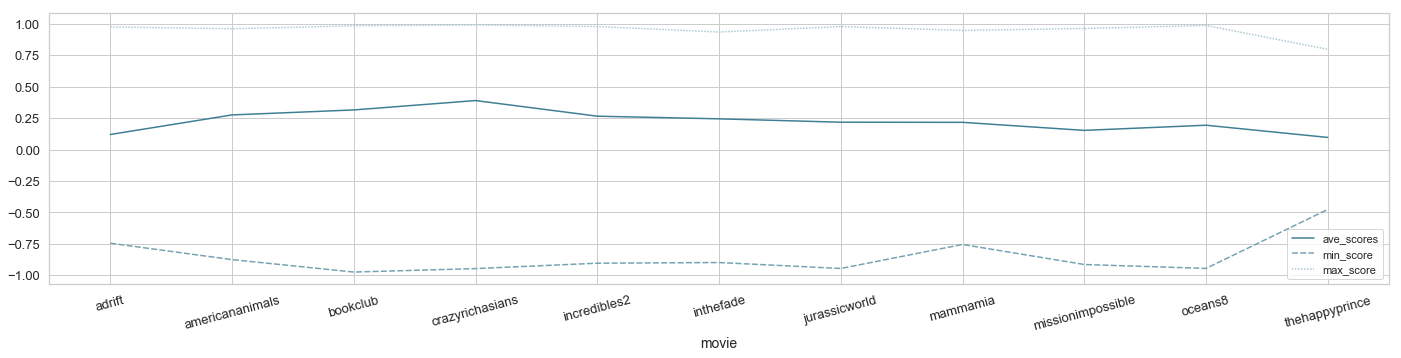

In [10]:
# Get dataframe for plotting scores for each movie.
index = df_movie_sentiment['movie']
data = []
for i, row in df_movie_sentiment.iterrows():
    data.append([row['ave_scores'], row['min_scores'], row['max_scores']])
df_movie_sentiment_plot = pd.DataFrame(data, index, ['ave_scores', 'min_score', 'max_score'])

plot_line_plot(df_movie_sentiment_plot)

Based on the above plot,
1. Crazy rich asians has the highest average sentiment score.
2. The Bookclub has the lowest minimum sentiment score.
3. Most of the movies has at least one pretty high score while crazy rich asians still has the highest maximum score.
4. Interestingly The Happy Prince has the lowest maximum score and highest minimum score.

### Top Positive, Neutral and Negative Words in Tweets

With the sentiment scores generated by VADER, we can also quickly explore what are the top positive, neutral and negative words in tweets.

In [11]:
# TODO

### Top Words used to Describe Different Emotions

We can also analyze which are the top words used to describe different emotions.

In [12]:
# TODO

Up until now we directly inspect & utilize sentiment socres from VADER.

However as we want to classify the sentiment into 5 groups, negative, somewhat negative, neutral, somewhat positive & positive, let's see the histogram of scores and see if there's any intuitive way to group them.

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


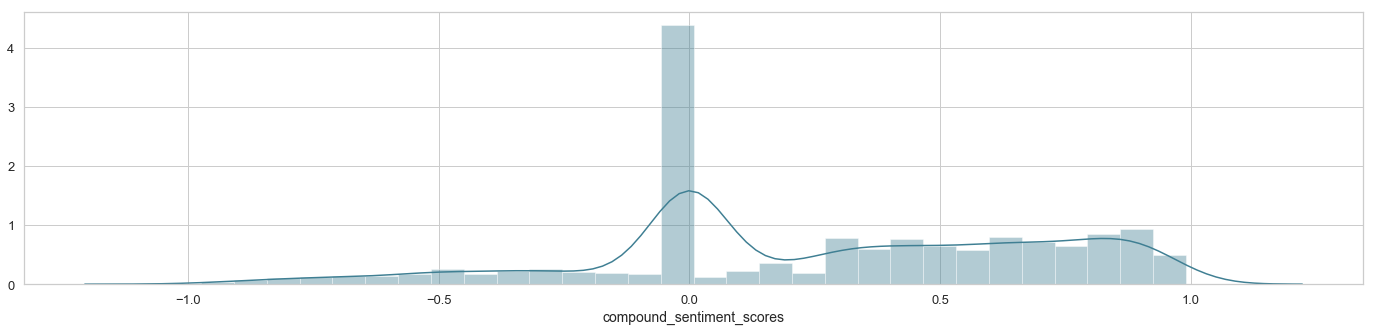

In [13]:
plot_dist_plot(df['compound_sentiment_scores'])

Looking at the above histogram, there are a lot of scores closed to 0, which apparently can be classified as 'neutral'.

Intuitively, we classify them into 5 groups using three threshold -0.5, 0 & 0.5. The groups are, negative, somewhat negative, neutral, somewhat positve & positive.

In [14]:
def apply_sentiment_class(x):
    if x == 0:
        return 'neutral'
    elif x > 0 and x <= 0.5:
        return 'somewhat positive'
    elif x > 0.5 and x <= 1:
        return 'positive'
    elif x < 0 and x >= -0.5:
        return 'somewhat negative'
    else:
        return 'negative'
    
df['semtiment_class'] = df['compound_sentiment_scores'].apply(apply_sentiment_class)

df.head(1)

,index,Tweets,Has_predefined_movies,Tweets_tokens,Tweets_tokens_len,Tweets_tokens_remove_special_chars,Tweets_tokens_remove_special_chars_len,Tweets_tokens_counter,Tweets_tokens_counter_most_common,Tweets_tokens_remove_special_chars_remove_stop_words,...,TF_IDF_score,TF_IDF_score_highest,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized_len,TF_IDF_score_lemmatized,TF_IDF_score_lemmatized_highest,sentiment_scores,compound_sentiment_scores,Has_predefined_movies_strs,semtiment_class
0,299,Come. To. Mama. Own #Oceans8 on Blu-ray™ tomorrow.,[oceans8],"[Come, ., To, ., Mama, ., Own, #, Oceans8, on, Blu-ray™, tomorrow, .]",13,"[Come, To, Mama, Own, on, tomorrow]",6,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'on': 1, 'tomorrow': 1}","[(Come, 1)]","[Come, To, Mama, Own, tomorrow]",...,"{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"[Come, To, Mama, Own, tomorrow]",5,"{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0,['oceans8'],neutral


The lables are now saved in 'semtiment_class' column.

With the label generated using VADER. We can use them to train our own models with supervised learning.

### Prepare functions for Preprocessing Features

As we would like to predict sentiment with tweets. Our features would be tweets and target would be sentiment labels we acquired using VADER.

In [15]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

max_fatures = 2000

# Let's tranform all tweets, the feature, to lower case first.
df['Tweets_lower'] = df['Tweets'].apply(lambda x: x.lower())

# and also encode sentiment class, our target
label_encoder = LabelEncoder()
df['semtiment_class_encoded'] = label_encoder.fit_transform(df['semtiment_class'])

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
# define feature & target
features = 'Tweets_lower'
target = 'semtiment_class_encoded'

In [17]:
def get_word_level_X(df, features):
    tokenizer = Tokenizer(num_words = max_fatures, split = ' ')
    tokenizer.fit_on_texts(df[features].values)

    X = tokenizer.texts_to_sequences(df[features].values)
    X = pad_sequences(X)
    
    print('Shape of X: ', X.shape)
    
    return X

def get_character_level_X(df, features):
    X = df[features].values
    X = char_arrs = [[c for c in x] for x in X]
    
    tokenizer = Tokenizer(char_level = True)
    tokenizer.fit_on_texts(char_arrs)
    
    X = tokenizer.texts_to_sequences(X)
    X = pad_sequences(X)
    
    print('Shape of X: ', X.shape)
    
    return X

def get_y(df, target):
    y = to_categorical(df[target])
    
    print('Shape of y: ', y.shape)
    
    return y

### Prepare functions for Scoring & Reporting

As the problem is a text classification problem and we report confusion matrix for each model.

In [44]:
from numpy import argmax
from sklearn.metrics import confusion_matrix

def score_and_report(X_test, y_test, y_pred, model, batch_size):
    score, acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
    print("score: %.2f" % (score))
    print("acc: %.2f" % (acc))

    y_test_decoded = [argmax(y_test[i]) for i in range(y_test.shape[0])]    

    print(confusion_matrix(y_test_decoded, y_pred))
    
    return (score, acc)

### Prepare functions for Modeling

#### We will first try the following models:
1. Long Short-Term Memory (LSTM)
2. Multiplicative Long-Short Term Memory (mLSTM)
3. Convolutional Neural Network (CNN)
4. Temporal Convolutional Network (TCN)

#### References:
1. mLSTM:
 * Paper: [Learning to Generate Reviews and Discovering Sentiment](https://arxiv.org/pdf/1704.01444.pdf)
 * Paper: [MULTIPLICATIVE LSTM FOR SEQUENCE MODELLING](https://arxiv.org/pdf/1609.07959.pdf)
 * Code: https://github.com/titu1994/Keras-Multiplicative-LSTM
2. TCN:
 * Paper: [An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling](https://arxiv.org/pdf/1803.01271.pdf)
 * Code: https://github.com/philipperemy/keras-tcn

#### Train-Test-Split
And use train_test_split to do train-test split.

TODO: Cross validation?

In [19]:
from sklearn.model_selection import train_test_split

from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Input

from keras.layers import LSTM, SpatialDropout1D
from multiplicative_lstm import MultiplicativeLSTM
from keras.layers import Convolution1D, Flatten, Dropout
from tcn import TCN

TextModes = ['WORD', 'CHAR']
Models = ['LSTM', 'mLSTM', 'CNN', 'TCN']

def model_lstm_mlstm_cnn_tcn(model_mode, text_mode, data, features, target):
    if model_mode not in Models:
        print('Model not defined')
        return
    
    if text_mode not in TextModes:
        print('Text mode not defined')
        return
    
    # preprocess data
    if text_mode == 'WORD':
        X = get_word_level_X(data, features)
    elif text_mode == 'CHAR':
        X = get_character_level_X(df, features)
    
    y = get_y(data, target)

    embed_dim = 128
    
    if model_mode == 'LSTM':
        lstm_out = 196
        
        model = Sequential()
        model.add(Embedding(max_fatures, embed_dim, input_length = X.shape[1]))
        model.add(SpatialDropout1D(0.4))
        model.add(LSTM(lstm_out, dropout = 0.2, recurrent_dropout = 0.2))
        model.add(Dense(5, activation = 'softmax'))
    elif model_mode == 'mLSTM':
        lstm_out = 196
        
        model = Sequential()
        model.add(Embedding(max_fatures, embed_dim, input_length = X.shape[1]))
        model.add(SpatialDropout1D(0.4))
        model.add(MultiplicativeLSTM(lstm_out, dropout = 0.2, recurrent_dropout = 0.2))
        model.add(Dense(5, activation = 'softmax'))
    elif model_mode == 'CNN':
        model = Sequential()
        model.add(Embedding(max_fatures, embed_dim, input_length = X.shape[1]))
        model.add(Convolution1D(64, 3, border_mode = 'same'))
        model.add(Convolution1D(32, 3, border_mode = 'same'))
        model.add(Convolution1D(16, 3, border_mode = 'same'))
        model.add(Flatten())
        model.add(Dropout(0.4))
        model.add(Dense(180, activation = 'sigmoid'))
        model.add(Dropout(0.4))
        model.add(Dense(5, activation = 'softmax'))
    elif model_mode == 'TCN':
        i = Input(shape = (X.shape[1], ))
        o = Embedding(max_fatures, embed_dim, input_length = X.shape[1])(i)
        o = TCN(return_sequences = True, dropout_rate = 0.4, name = 'TCN_1')(o)
        o = TCN(return_sequences = True, dropout_rate = 0.4, name = 'TCN_2')(o)
        o = TCN(return_sequences = False, dropout_rate = 0.4, name = 'TCN_3')(o)
        o = Dropout(0.4)(o)
        o = Dense(180, activation = 'sigmoid')(o)
        o = Dropout(0.4)(o)
        o = Dense(5, activation = 'softmax')(o)
        model = Model(inputs=[i], outputs=[o])
            
    print('Text:', text_mode, 'Model:', model_mode)
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    print(model.summary())

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .33)
              
    batch_size = 32
    
    model.fit(X_train, y_train, epochs = 10, batch_size = batch_size, verbose = 2, shuffle = False)
    
    if model_mode == 'TCN':
        y_pred_prob = model.predict(X_test)    
        y_pred = [argmax(y_pred_prob[i]) for i in range(y_pred_prob.shape[0])]
    else:
        y_pred = model.predict_classes(X_test)
    
    score, acc = score_and_report(X_test, y_test, y_pred, model, batch_size)
    
    return (score, acc)

def try_all_modes(data, features, target, model_func):
    scores, accs = {}, {}
    for t in TextModes:
        for m in Models:
            score, acc = model_func(model_mode = m, text_mode = t, data = df, features = features, target = target)
            scores[(t, m)] = score
            accs[(t, m)] = acc
    return (scores, accs)

### Modeling

Let's try both word-level and character-level on LSTM, mLSTM, CNN & TCN.

In [20]:
scores, accs = try_all_modes(data = df, features = features, target = target, model_func = model_lstm_mlstm_cnn_tcn)

Shape of X:  (7628, 52)
Shape of y:  (7628, 5)
Text: WORD Model: LSTM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 52, 128)           256000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 52, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 985       
Total params: 511,785
Trainable params: 511,785
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
 - 22s - loss: 1.3347 - acc: 0.4618
Epoch 2/10
 - 19s - loss: 1.0602 - acc: 0.5949
Epoch 3/10
 - 17s - loss: 0.8476 - acc: 0.6885
Epoch 4/10
 - 19s - loss: 0.7104 - acc: 0.7440
Epoch

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(32, 3, padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(16, 3, padding="same")`


Epoch 1/10
 - 4s - loss: 1.3577 - acc: 0.4532
Epoch 2/10
 - 3s - loss: 1.0803 - acc: 0.5847
Epoch 3/10
 - 3s - loss: 0.9131 - acc: 0.6630
Epoch 4/10
 - 3s - loss: 0.7170 - acc: 0.7442
Epoch 5/10
 - 3s - loss: 0.5633 - acc: 0.8023
Epoch 6/10
 - 3s - loss: 0.4455 - acc: 0.8466
Epoch 7/10
 - 3s - loss: 0.3594 - acc: 0.8769
Epoch 8/10
 - 3s - loss: 0.2564 - acc: 0.9182
Epoch 9/10
 - 3s - loss: 0.1935 - acc: 0.9372
Epoch 10/10
 - 3s - loss: 0.1635 - acc: 0.9464
score: 1.98
acc: 0.59
[[ 18  25  23  27  35]
 [ 25 530  56  28  91]
 [ 20  48 696  20  91]
 [ 29  48  47  63  58]
 [ 34 107 176  47 176]]
Shape of X:  (7628, 52)
Shape of y:  (7628, 5)
Text: WORD Model: TCN
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 52)           0                                            
___________________________________

Epoch 1/10
 - 40s - loss: 1.5579 - acc: 0.3006
Epoch 2/10
 - 35s - loss: 1.4940 - acc: 0.3290
Epoch 3/10
 - 35s - loss: 1.3768 - acc: 0.4423
Epoch 4/10
 - 35s - loss: 1.2469 - acc: 0.5262
Epoch 5/10
 - 35s - loss: 1.1261 - acc: 0.5783
Epoch 6/10
 - 35s - loss: 1.0610 - acc: 0.6086
Epoch 7/10
 - 34s - loss: 1.0203 - acc: 0.6333
Epoch 8/10
 - 34s - loss: 0.9728 - acc: 0.6489
Epoch 9/10
 - 34s - loss: 0.9190 - acc: 0.6765
Epoch 10/10
 - 34s - loss: 0.8724 - acc: 0.6916
score: 1.05
acc: 0.64
[[  0  39  23  21  45]
 [  0 591  15  43  81]
 [  0  26 650  11 188]
 [  0  72  38  46  89]
 [  0  68 111  38 323]]
Shape of X:  (7628, 338)
Shape of y:  (7628, 5)
Text: CHAR Model: LSTM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 338, 128)          256000    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 338, 128)          0

__________________________________________________________________________________________________
TCN_1_dilated_conv_8_tanh_s0 (C (None, 338, 64)      8256        add_24[0][0]                     
__________________________________________________________________________________________________
activation_25 (Activation)      (None, 338, 64)      0           TCN_1_dilated_conv_8_tanh_s0[0][0
__________________________________________________________________________________________________
lambda_23 (Lambda)              (None, 338, 64)      0           activation_25[0][0]              
__________________________________________________________________________________________________
TCN_1_spatial_dropout1d_8_s0_0. (None, 338, 64)      0           lambda_23[0][0]                  
__________________________________________________________________________________________________
conv1d_28 (Conv1D)              (None, 338, 64)      4160        TCN_1_spatial_dropout1d_8_s0_0.40
__________

Epoch 1/10
 - 207s - loss: 1.5539 - acc: 0.3010
Epoch 2/10
 - 203s - loss: 1.5130 - acc: 0.3033
Epoch 3/10
 - 2909s - loss: 1.4780 - acc: 0.3202
Epoch 4/10
 - 281s - loss: 1.4631 - acc: 0.3354
Epoch 5/10
 - 277s - loss: 1.4531 - acc: 0.3468
Epoch 6/10
 - 384s - loss: 1.4555 - acc: 0.3438
Epoch 7/10
 - 400s - loss: 1.4505 - acc: 0.3423
Epoch 8/10
 - 434s - loss: 1.4537 - acc: 0.3436
Epoch 9/10
 - 429s - loss: 1.4511 - acc: 0.3489
Epoch 10/10
 - 453s - loss: 1.4495 - acc: 0.3470
score: 1.44
acc: 0.35
[[  0   0 128   0   0]
 [  0   0 730   0   0]
 [  0   0 875   0   0]
 [  0   0 245   0   0]
 [  0   0 540   0   0]]


In [21]:
def cmp_scores_and_accuracies(scores, accs):
    scoresDf = pd.DataFrame(list(scores.items()))
    scoresDf.columns = ['Modes', 'Score']
    accDf = pd.DataFrame(list(accs.items()))
    accDf.columns = ['Modes', 'Accuracy']
    
    print('Scores:')
    print(scoresDf.head(20))
    plot_point_plot(x = 'Modes', y = 'Score', data = scoresDf)
    
    print('Accuracies:')
    print(accDf.head(20))
    plot_point_plot(x = 'Modes', y = 'Accuracy', data = accDf)

Scores:
           Modes     Score
0   (WORD, LSTM)  1.224636
1  (WORD, mLSTM)  1.304401
2    (WORD, CNN)  1.979849
3    (WORD, TCN)  1.049472
4   (CHAR, LSTM)  1.329260
5  (CHAR, mLSTM)  1.321469
6    (CHAR, CNN)  1.667345
7    (CHAR, TCN)  1.440341


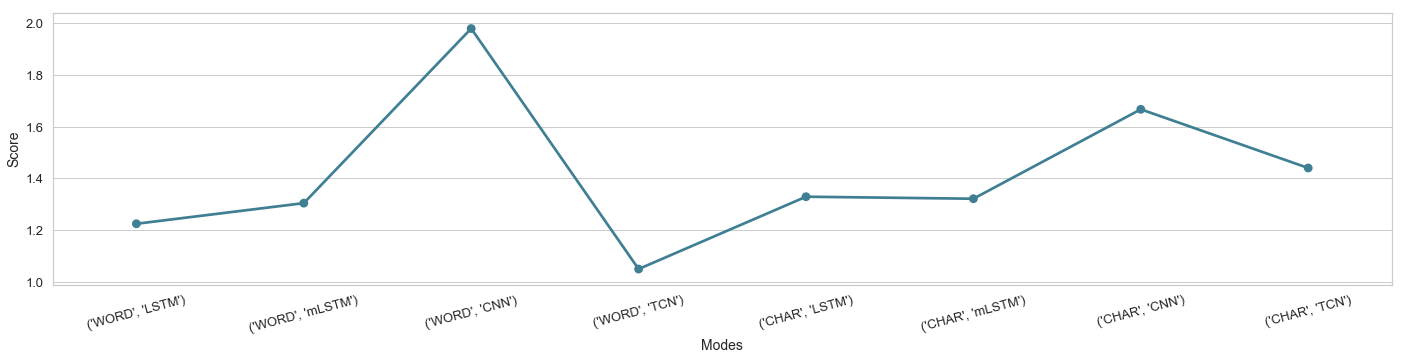

Accuracies:
           Modes  Accuracy
0   (WORD, LSTM)  0.648133
1  (WORD, mLSTM)  0.659651
2    (WORD, CNN)  0.588959
3    (WORD, TCN)  0.639396
4   (CHAR, LSTM)  0.465846
5  (CHAR, mLSTM)  0.478554
6    (CHAR, CNN)  0.447975
7    (CHAR, TCN)  0.347498


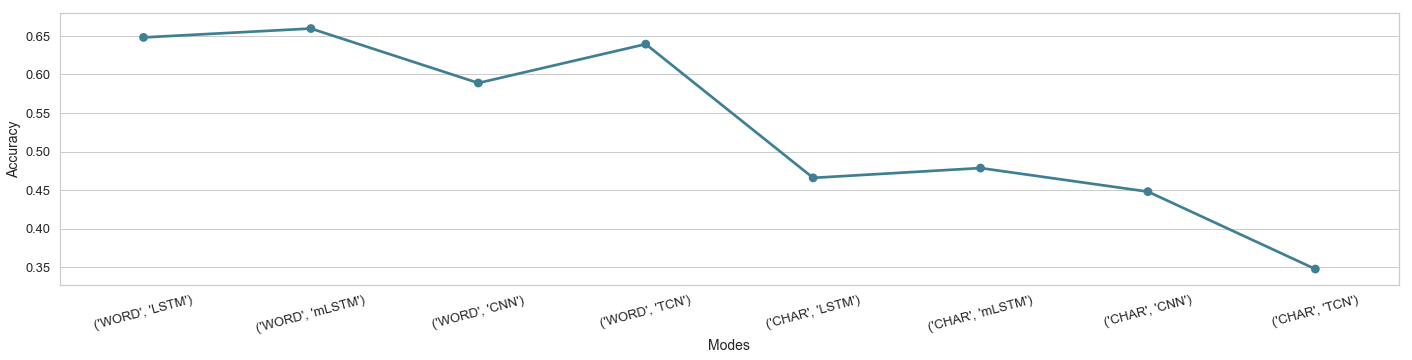

In [22]:
cmp_scores_and_accuracies(scores, accs)

According to the training process and scores/accuracy plots, for word-level modeling,
1. mLSTM has best accuracy.
2. LSTM & mLSTM performs better than CNN & TCN.
3. TCN performs better than CNN.

In general word-level accuracies are better than character-level. It might because that # TODO.

### Modeling Next Character with Charaters First

TODO: For character-level modeling, we can also train the model to predict next character (instead of predicting sentiment) first and then apply another classifier on the results.

In [37]:
def get_next_character_model_X_and_y(tweets):
    text = ''

    for tweet in tweets:
        for token in tweet:
            text += token + ' '

    chars = sorted(list(set(text)))
    char2idMap = dict((c, i) for i, c in enumerate(chars))
    id2charMap = dict((i, c) for i, c in enumerate(chars))

    print("Total ", len(chars), ' characters.')
    
    seq_len, step = 40, 10

    sentences, next_chars = [], []

    for i in range(0, len(text) - seq_len, step):
        sentences.append(text[i: i + seq_len])
        next_chars.append(text[i + seq_len])

    print("Total ", len(sentences), ' data points.')
    
    X = np.zeros((len(sentences), seq_len, len(chars)), dtype = np.bool)
    y = np.zeros((len(sentences), len(chars)), dtype = np.bool)

    for i, sentence in enumerate(sentences):
        for j, char in enumerate(sentence):
            X[i, j, char2idMap[char]] = 1
        y[i, char2idMap[next_chars[i]]] = 1
        
    print('Shape of X: ', X.shape)
    print('Shape of y: ', y.shape)
        
    return X, y

In [45]:
from sklearn.model_selection import train_test_split

from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Input

from keras.layers import LSTM, SpatialDropout1D, SpatialDropout2D
from multiplicative_lstm import MultiplicativeLSTM
from keras.layers import Convolution1D, Flatten, Dropout
from tcn import TCN

TextModes = ['CHAR']
Models = ['LSTM', 'mLSTM', 'CNN', 'TCN']

def model_lstm_mlstm_cnn_tcn_next_char(model_mode, text_mode, data, features):
    if model_mode not in Models:
        print('Model not defined')
        return
    
    if text_mode not in TextModes:
        print('Text mode not defined')
        return

    # preprocess data
    if text_mode == 'CHAR':
        tweets = list(df[features])
        X, y = get_next_character_model_X_and_y(tweets)
    
    embed_dim = 128
    
    if model_mode == 'LSTM':
        lstm_out = 196
        
        model = Sequential()
        model.add(LSTM(lstm_out, dropout = 0.2, recurrent_dropout = 0.2, input_shape = (X.shape[1], X.shape[2])))
        model.add(Dense(X.shape[2], activation = 'softmax'))
    elif model_mode == 'mLSTM':
        lstm_out = 196
        
        model = Sequential()
        model.add(MultiplicativeLSTM(lstm_out, dropout = 0.2, recurrent_dropout = 0.2, input_shape = (X.shape[1], X.shape[2])))
        model.add(Dense(X.shape[2], activation = 'softmax'))
    elif model_mode == 'CNN':
        model = Sequential()
        # model.add(Embedding(max_fatures, embed_dim, input_length = X.shape[1]))
        model.add(Convolution1D(64, 3, border_mode = 'same', input_shape = (X.shape[1], X.shape[2])))
        model.add(Convolution1D(32, 3, border_mode = 'same'))
        model.add(Convolution1D(16, 3, border_mode = 'same'))
        model.add(Flatten())
        model.add(Dropout(0.4))
        model.add(Dense(180, activation = 'sigmoid'))
        model.add(Dropout(0.4))
        model.add(Dense(X.shape[2], activation = 'softmax'))
    elif model_mode == 'TCN':
        i = Input(shape = (X.shape[1], X.shape[2]))
        # o = Embedding(max_fatures, embed_dim, input_length = X.shape[1])(i)
        o = TCN(return_sequences = True, dropout_rate = 0.4, name = 'TCN_1')(i)
        o = TCN(return_sequences = True, dropout_rate = 0.4, name = 'TCN_2')(o)
        o = TCN(return_sequences = False, dropout_rate = 0.4, name = 'TCN_3')(o)
        o = Dropout(0.4)(o)
        o = Dense(180, activation = 'sigmoid')(o)
        o = Dropout(0.4)(o)
        o = Dense(X.shape[2], activation = 'softmax')(o)
        model = Model(inputs=[i], outputs=[o])
            
    print('Text:', text_mode, 'Model:', model_mode)
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    print(model.summary())

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .33)
              
    batch_size = 32
    
    model.fit(X_train, y_train, epochs = 10, batch_size = batch_size, verbose = 2, shuffle = False)
    
    if model_mode == 'TCN':
        y_pred_prob = model.predict(X_test)    
        y_pred = [argmax(y_pred_prob[i]) for i in range(y_pred_prob.shape[0])]
    else:
        y_pred = model.predict_classes(X_test)
    
    score, acc = score_and_report(X_test, y_test, y_pred, model, batch_size)
    
    return (score, acc)

def try_all_modes_next_char(data, features, model_func):
    scores, accs = {}, {}
    for t in TextModes:
        for m in Models:
            score, acc = model_func(model_mode = m, text_mode = t, data = df, features = features)
            scores[(t, m)] = score
            accs[(t, m)] = acc
    return (scores, accs)

In [46]:
scores, accs = try_all_modes_next_char(data = df, features = features, model_func = model_lstm_mlstm_cnn_tcn_next_char)

Total  212  characters.
Total  222368  data points.
Shape of X:  (222368, 40, 212)
Shape of y:  (222368, 212)
Text: CHAR Model: LSTM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 196)               320656    
_________________________________________________________________
dense_22 (Dense)             (None, 212)               41764     
Total params: 362,420
Trainable params: 362,420
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
 - 354s - loss: 2.8082 - acc: 0.2277
Epoch 2/10
 - 349s - loss: 2.4151 - acc: 0.3259
Epoch 3/10
 - 338s - loss: 2.2511 - acc: 0.3697
Epoch 4/10
 - 337s - loss: 2.1560 - acc: 0.3962
Epoch 5/10
 - 339s - loss: 2.0932 - acc: 0.4118
Epoch 6/10
 - 337s - loss: 2.0545 - acc: 0.4217
Epoch 7/10
 - 336s - loss: 2.0195 - acc: 0.4326
Epoch 8/10
 - 339s - loss: 1.9939 - acc: 0.4381
Epoch 9/10

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, input_shape=(40, 212), padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(32, 3, padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(16, 3, padding="same")`


Text: CHAR Model: CNN
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_46 (Conv1D)           (None, 40, 64)            40768     
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 40, 32)            6176      
_________________________________________________________________
conv1d_48 (Conv1D)           (None, 40, 16)            1552      
_________________________________________________________________
flatten_4 (Flatten)          (None, 640)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 640)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 180)               115380    
_________________________________________________________________
dropout_12 (Dropout)         (None, 180)              

Epoch 1/10
 - 1414s - loss: 2.9598 - acc: 0.1902
Epoch 2/10
 - 9192s - loss: 2.6285 - acc: 0.2619
Epoch 3/10
 - 827s - loss: 2.5283 - acc: 0.2941
Epoch 4/10
 - 821s - loss: 2.4528 - acc: 0.3158
Epoch 5/10
 - 817s - loss: 2.4032 - acc: 0.3318
Epoch 6/10
 - 819s - loss: 2.3638 - acc: 0.3410
Epoch 7/10
 - 3221s - loss: 2.3329 - acc: 0.3477
Epoch 8/10
 - 4882s - loss: 2.3083 - acc: 0.3549
Epoch 9/10
 - 5167s - loss: 2.2912 - acc: 0.3606
Epoch 10/10
 - 6337s - loss: 2.2700 - acc: 0.3650
score: 2.12
acc: 0.40
[[9631    0    0 ...    0    0    0]
 [ 239    0    0 ...    0    0    0]
 [  24    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


Scores:
           Modes     Score
0   (CHAR, LSTM)  1.842980
1  (CHAR, mLSTM)  1.723104
2    (CHAR, CNN)  2.175608
3    (CHAR, TCN)  2.115352


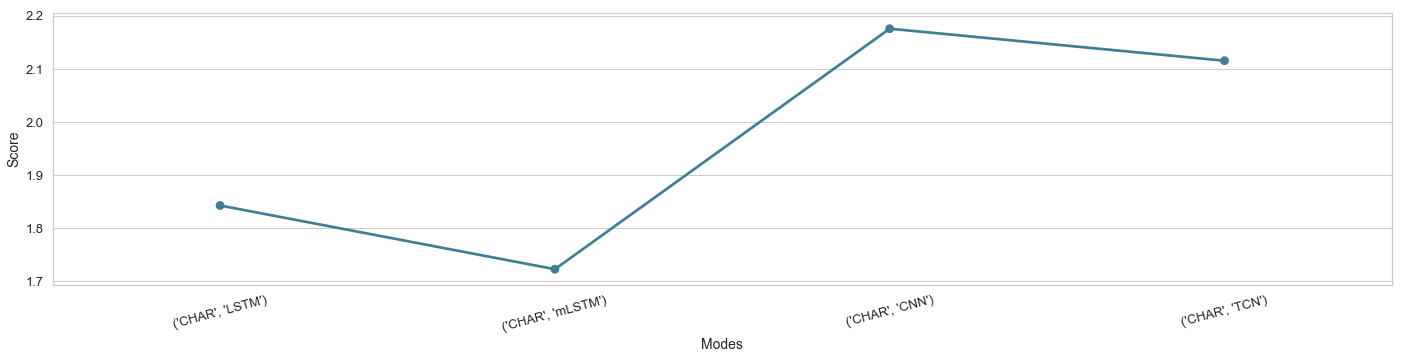

Accuracies:
           Modes  Accuracy
0   (CHAR, LSTM)  0.479941
1  (CHAR, mLSTM)  0.515903
2    (CHAR, CNN)  0.388092
3    (CHAR, TCN)  0.403641


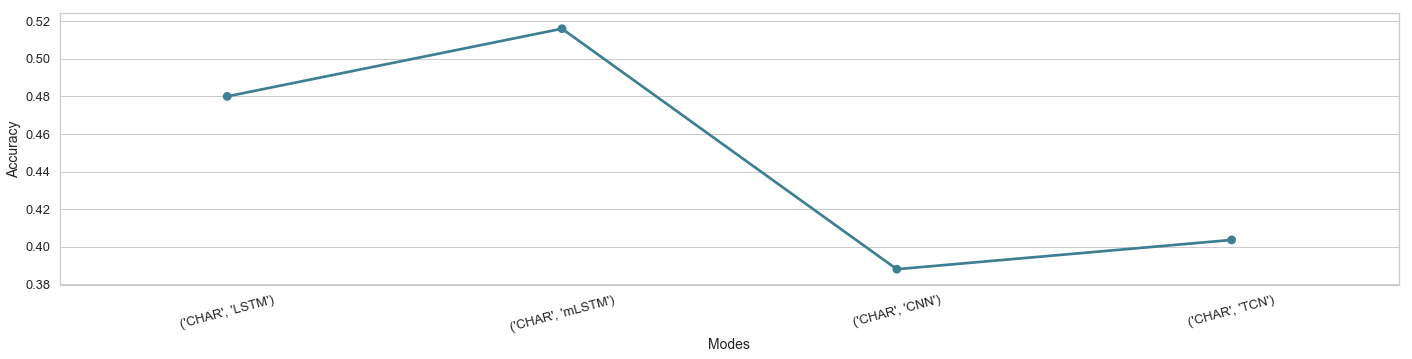

In [47]:
cmp_scores_and_accuracies(scores, accs)

### Conclusion
TODO.

### Next Steps
1. When acquiring labels with VADER, we can try to apply other strategies instead of using hard-coded threshold.
2. Apply dimmensionality reduction on texts to see if results are better.
3. Apply pre-trained model for embedding.
4. Include emojis and other special characters for character-level training.